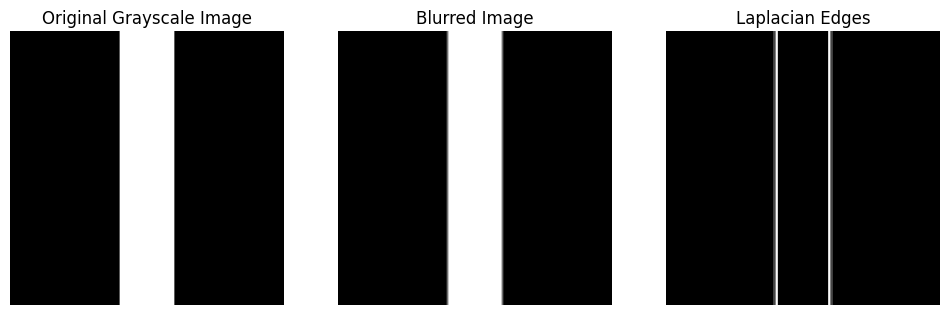

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import io, color
import cv2
# Function to apply Gaussian blur
def gaussian_blur(image, kernel_size=3, sigma=1.0):
    ax = np.linspace(-(kernel_size - 1) / 2., (kernel_size - 1) / 2., kernel_size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    kernel = kernel / np.sum(kernel)
    return convolve(image, kernel)

# Function to apply Laplacian filter
def laplacian_filter(image):
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])
    return convolve(image, kernel)

# Load the image
image_url = '1.png'  # replace with your image path
image = cv2.imread(image_url)
gray_image = cv2.imread(image_url,0)  # Convert to grayscale

# Apply Gaussian blur
blurred_image = gaussian_blur(gray_image)

# Apply Laplacian filter
laplacian_image = laplacian_filter(blurred_image)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(np.abs(laplacian_image), cmap='gray')
plt.title('Laplacian Edges')
plt.axis('off')

plt.show()
